In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysa.emd as emddev
import pysa.eemd as eemddev
import pysa.visualization as plotter
import pysa.utils as utils
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,10)

In [2]:
df = pd.read_csv("Data/sample_10s_lr2.csv", index_col=0)

In [3]:
df.head()

,timestamp,0,1,2,3,4,5,6,7
0,8067.201529,-187500.015625,-28049.115234,-6624.476074,27519.625000,-9427.384766,-187500.046875,31298.343750,14856.869141
1,8067.201656,-187500.015625,-28514.433594,-6360.680664,27120.220703,-9289.608398,-187500.046875,31624.097656,15042.657227
2,8067.201780,-187500.015625,-28732.810547,-5943.641602,25988.730469,-8927.443359,-187500.046875,32051.082031,15437.478516
3,8067.201907,-187500.015625,-28401.712891,-5943.306641,25679.427734,-8834.593750,-187500.046875,31997.169922,15503.303711
4,8067.202093,-187500.015625,-27973.855469,-6367.877930,26644.240234,-9143.472656,-187500.046875,31536.724609,15151.464844


In [4]:
data = df.as_matrix()

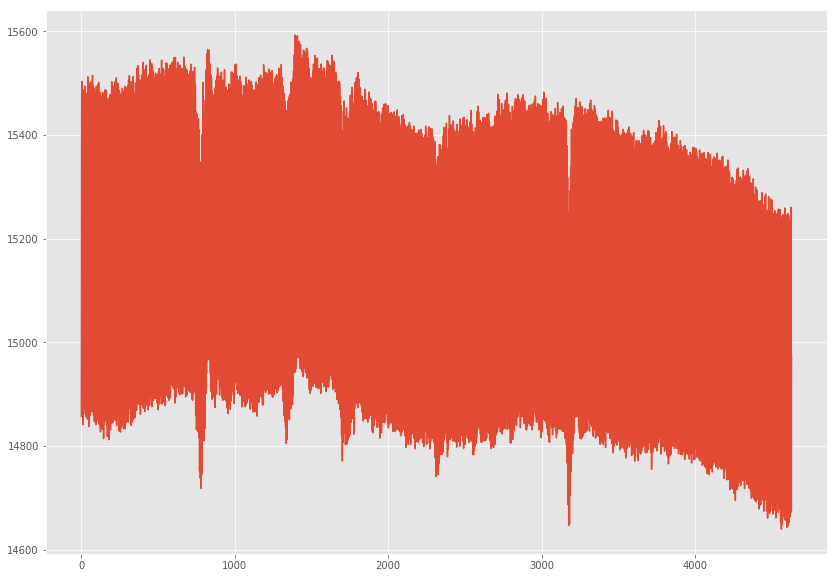

In [5]:
plt.plot(data[:,8])

In [6]:
max_modes = 15
ensembles = 100
ensembles_per_process = 10
max_siftings = 200
end_time = 10
sample_freq = 250

In [7]:
signal = data[:,8]
max_data = max(signal)
min_data = min(signal)

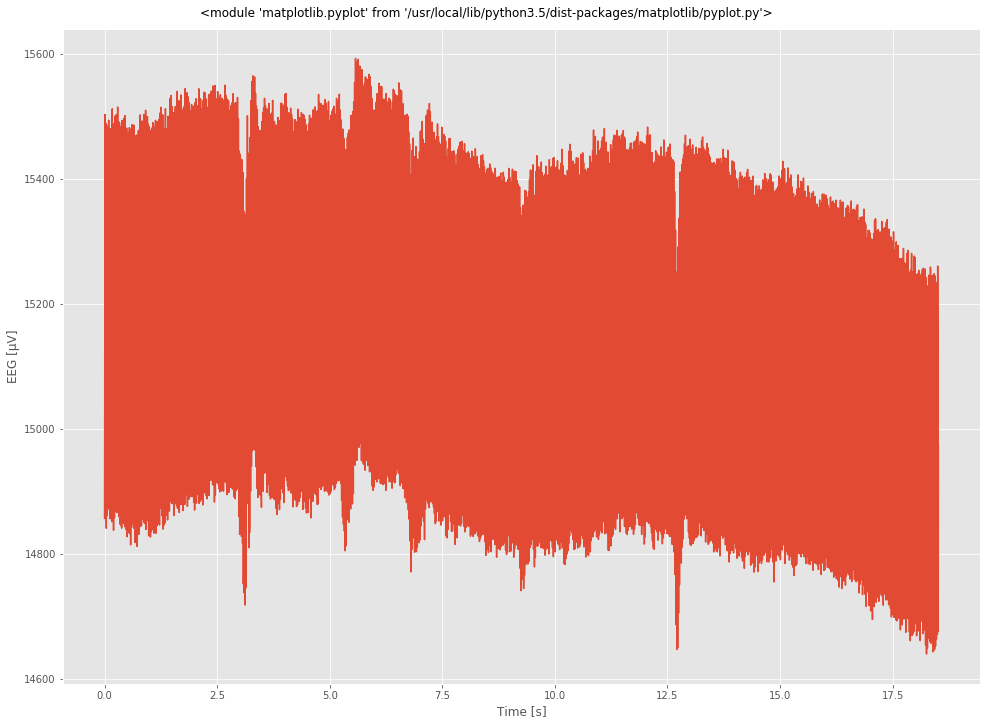

In [8]:
plotter.plot_single_channel(sample_freq, signal, plt)

In [9]:
imfs = emddev.emd(signal, min_data, max_data, max_modes, max_siftings)

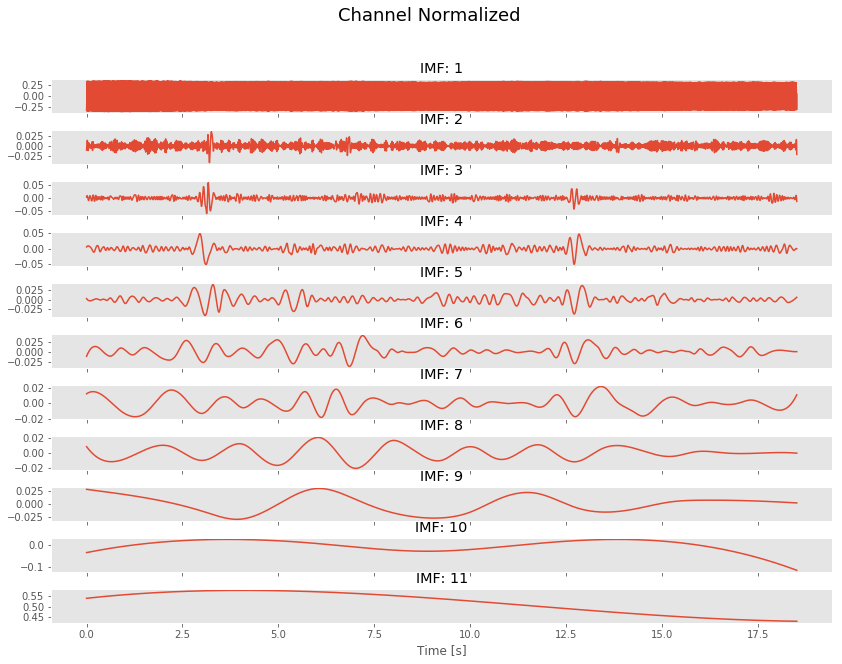

In [10]:
plotter.plot_intrinsic_mode_functions(sample_freq, imfs, "Normalized", plt)

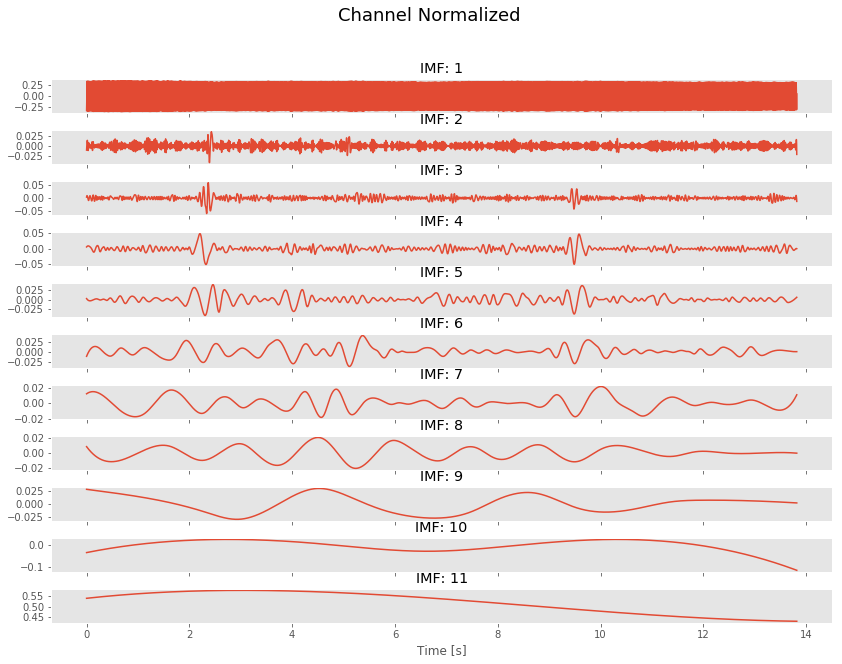

In [11]:
plotter.plot_intrinsic_mode_functions(335, imfs, "Normalized", plt)

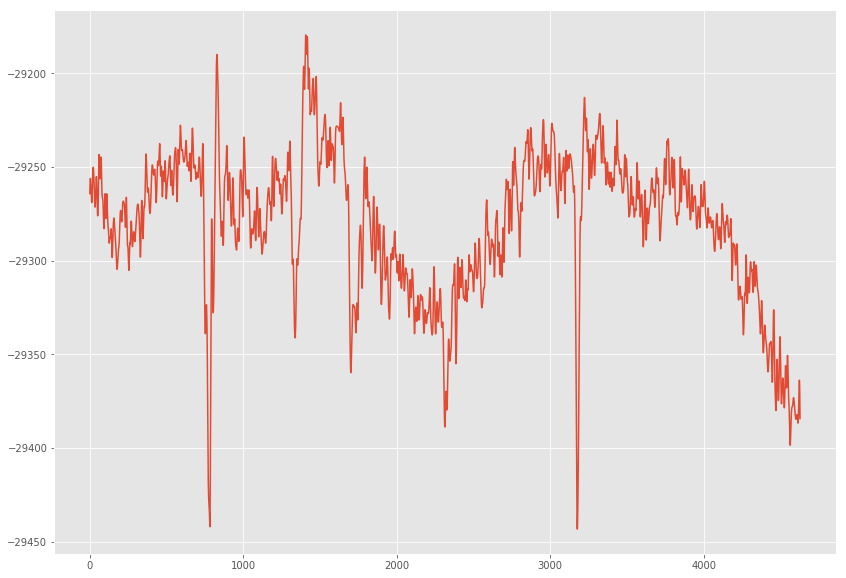

In [12]:
imf1 = utils.reverse_normalization(imfs[0], min_data, max_data, len(signal))
imf2 = utils.reverse_normalization(imfs[1], min_data, max_data, len(signal))
residue = utils.reverse_normalization(imfs[10], min_data, max_data, len(signal))
plt.plot(signal - imf1 - imf2 - residue)

In [13]:
imfs = eemddev.eemd(signal, 0.1, max_modes, max_siftings, 10, 2)

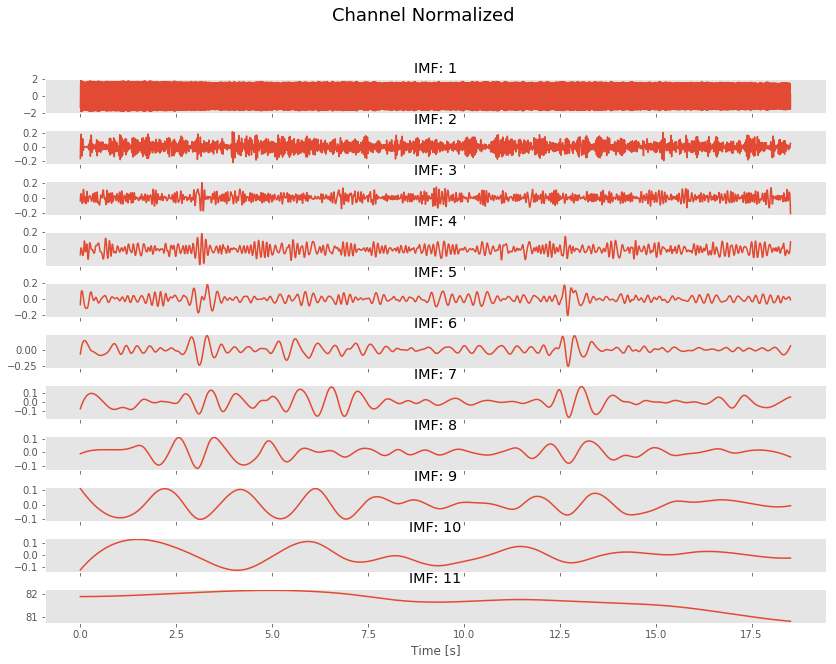

In [14]:
plotter.plot_intrinsic_mode_functions(sample_freq, imfs, "Normalized", plt)

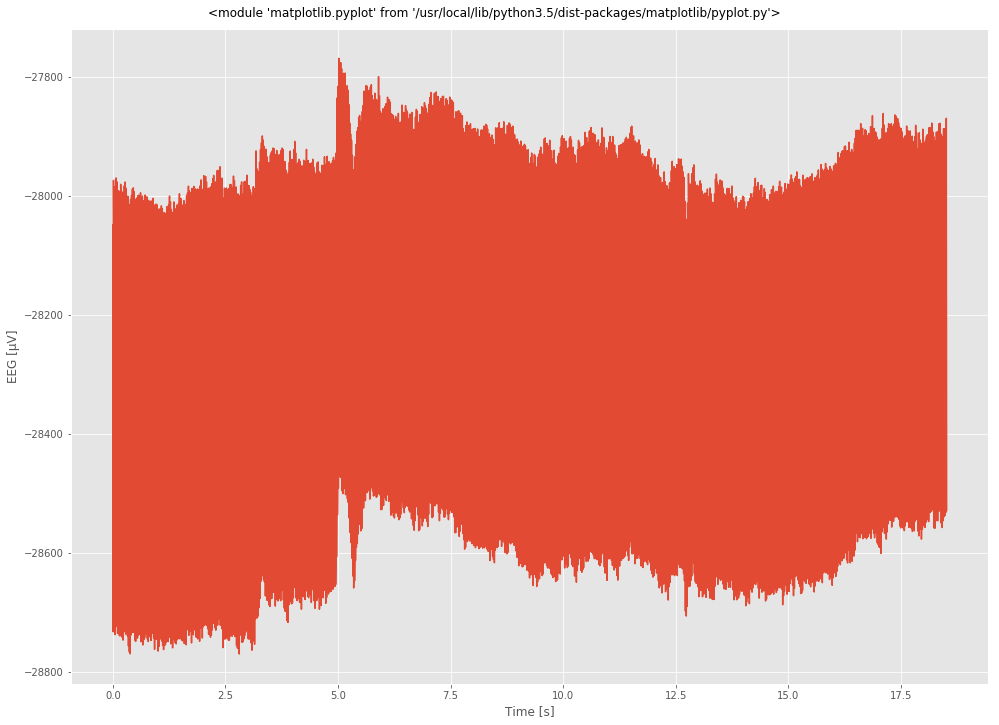